In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv("Groceries_dataset.csv")

In [3]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
data.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [6]:
data.nunique()

Member_number      3898
Date                728
itemDescription     167
dtype: int64

In [7]:
data.shape

(38765, 3)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [11]:
data.Date = pd.to_datetime(data.Date)

In [12]:
data['Year'] = data.Date.apply(lambda x : x.year)

In [14]:
data['Month'] = data.Date.apply(lambda x : x.month)
data['Days of Week'] = data.Date.apply(lambda x : x.dayofweek)

In [15]:
data

,Member_number,Date,itemDescription,Year,Month,Days of Week
0,1808,2015-07-21,tropical fruit,2015,7,1
1,2552,2015-05-01,whole milk,2015,5,4
2,2300,2015-09-19,pip fruit,2015,9,5
3,1187,2015-12-12,other vegetables,2015,12,5
4,3037,2015-01-02,whole milk,2015,1,4
...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,6
38761,2022,2014-02-23,candy,2014,2,6
38762,1097,2014-04-16,cake bar,2014,4,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,2


In [16]:
data["Year"].value_counts()

2015    20488
2014    18277
Name: Year, dtype: int64

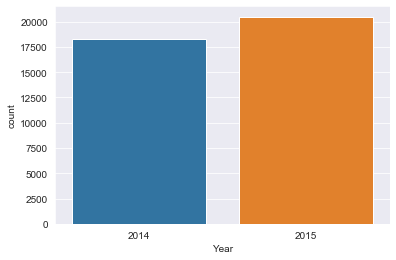

In [18]:
sns.countplot(data.Year)

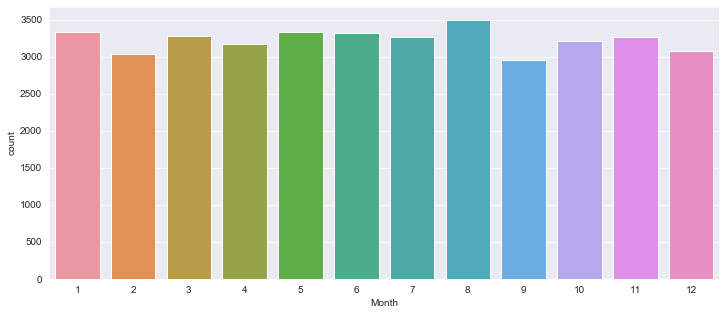

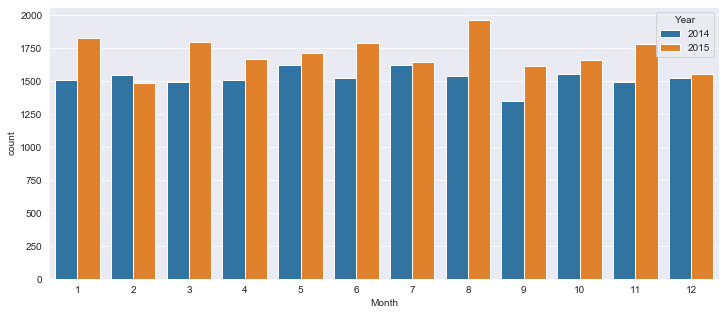

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(x="Month",data=data)
plt.figure(figsize=(12,5))
sns.countplot(data.Month,hue=data.Year)

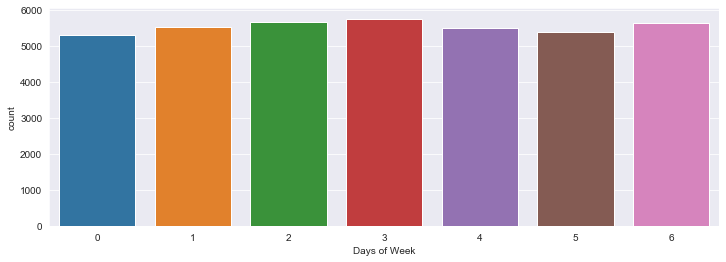

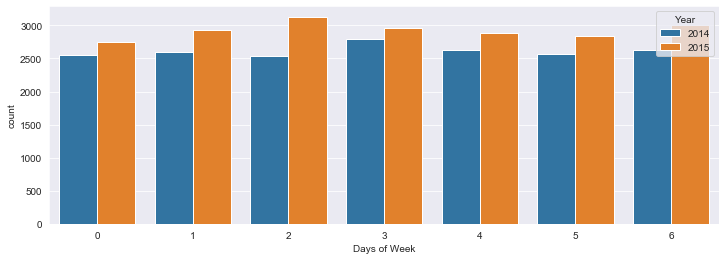

In [25]:
plt.figure(figsize=(12,4))
sns.countplot(x="Days of Week", data=data)
plt.figure(figsize=(12,4))
sns.countplot(x="Days of Week", data=data, hue="Year")

In [32]:
data["Month"].value_counts()

8     3498
5     3335
1     3333
6     3316
3     3283
11    3273
7     3268
10    3218
4     3172
12    3074
2     3032
9     2963
Name: Month, dtype: int64

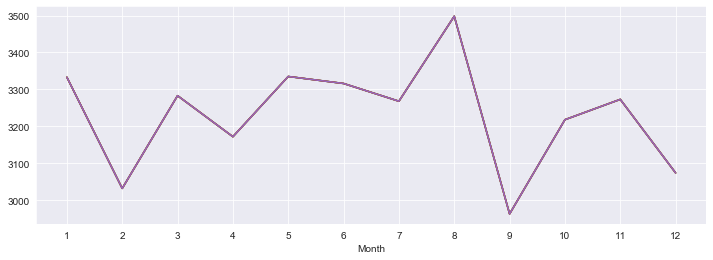

In [31]:
data.groupby('Month').count().plot(legend=False,figsize=(12,4))
plt.xticks([i for i in range(1,13)])
plt.show()

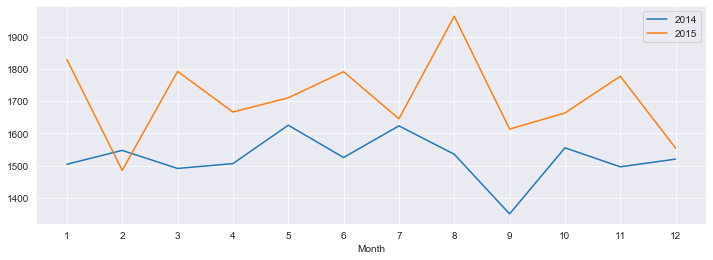

In [54]:
data[data["Year"]==2014].groupby("Month").count()["Date"].plot(label=2014,figsize=(12,4))
data[data["Year"]==2015].groupby("Month").count()["Date"].plot(label=2015)
plt.xticks([i for i in range(1,13)])
plt.legend()

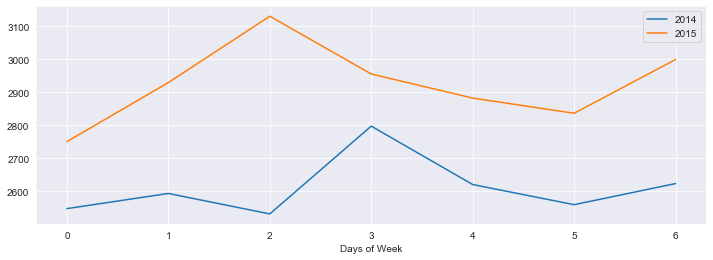

In [58]:
data[data["Year"]==2014].groupby("Days of Week").count()["Date"].plot(label=2014,figsize=(12,4))
data[data["Year"]==2015].groupby("Days of Week").count()["Date"].plot(label=2015)
plt.legend()

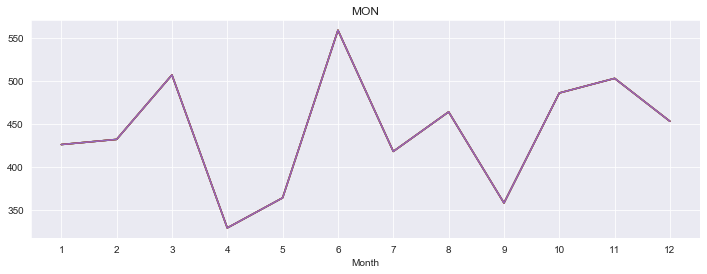

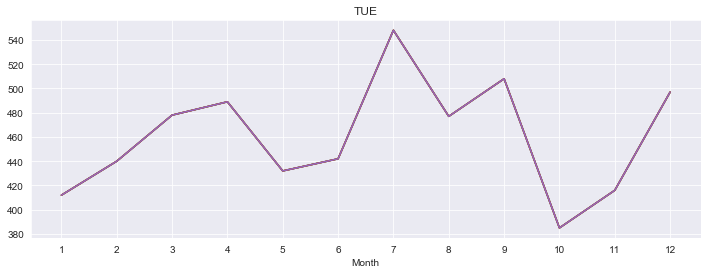

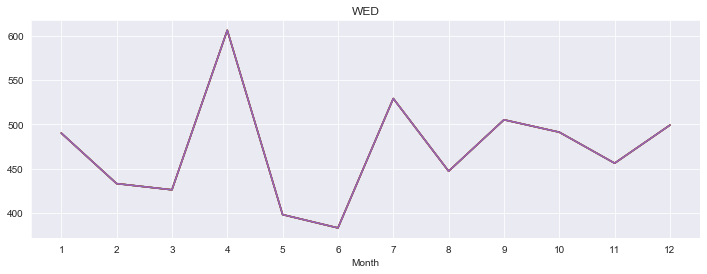

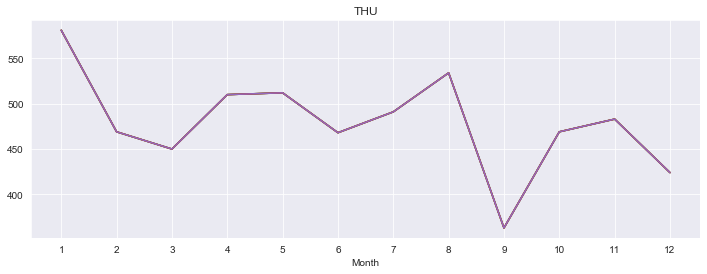

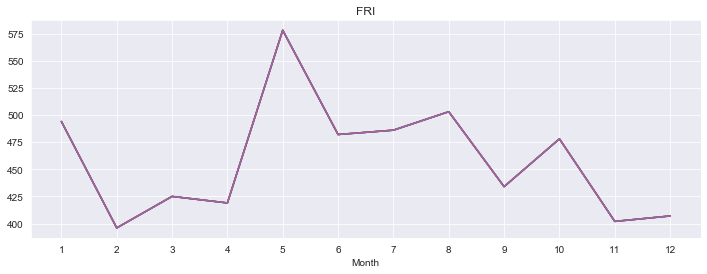

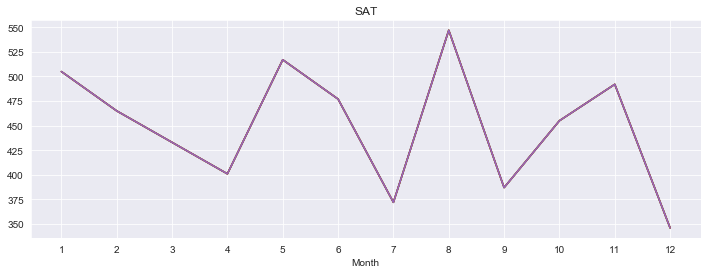

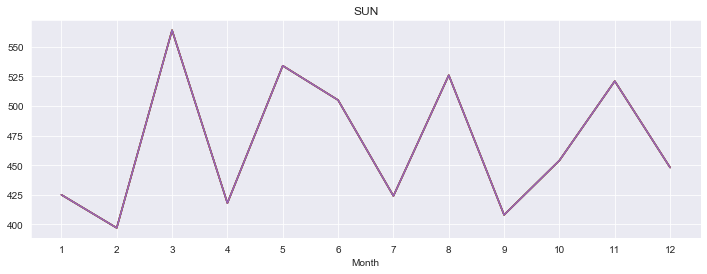

In [60]:
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
for i in range(0,7):

    data[data['Days of Week']==i].groupby('Month').count().plot(legend=False,figsize=(12,4))
    plt.xticks([i for i in range(1,13)])
    plt.title(days[i].upper())
    plt.show()

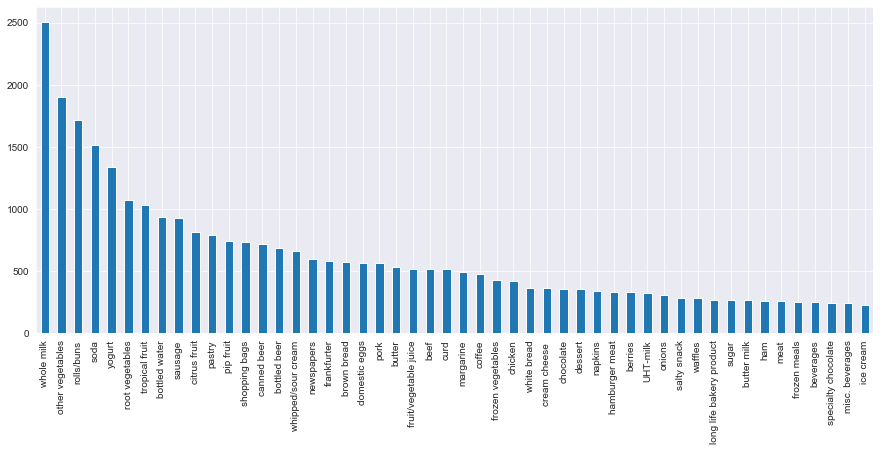

In [70]:
data.itemDescription.value_counts().head(50).plot(kind='bar',figsize=(15,6))